In [1]:
#import sys
#!{sys.executable} -m pip install facebook-sdk
#import facebook
#import sys
#!{sys.executable} -m pip install nba_api

import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install datetime
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install pickle-mixin



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import datetime as timedelta
import datetime as numeric
import matplotlib.pyplot as plt
import pickle

from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn import metrics

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# To read the data from file
df = pd.read_excel('Data_Train.xlsx')
#print(df)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# find shape of data (no. of rows and columns)
df.shape

(10683, 11)

In [4]:
# no.of missing values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
# drop the missing value
df.dropna(inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
#data types
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
# change into the datetime of all the dates of airline
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
# Change fate of journey, Departure time and arrival time into datetime
for i in ['Date_of_Journey', 'Dep_Time','Arrival_Time']:
        change_into_datetime(i)
df.dtypes

/home/jupyter-nidhi/.local/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/jupyter-nidhi/.local/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/jupyter-nidhi/.local/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/jupyter-nidhi/.local/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [9]:
# Seperate journey date into day and month
df['journey_Day']= df['Date_of_Journey'].dt.day
df['journey_month']= df['Date_of_Journey'].dt.month

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-10-21 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-21 05:50:00,2022-10-21 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-21 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-10-21 18:05:00,2022-10-21 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-10-21 16:50:00,2022-10-21 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [11]:
# Drop the fate of journey column
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-21 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-21 05:50:00,2022-10-21 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-21 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-10-21 18:05:00,2022-10-21 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-10-21 16:50:00,2022-10-21 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [12]:
# Seperate time into hour and minute
def extract_hour(df,col):
    df[col+ '_hour'] = df[col].dt.hour
    
def extract_min(df,col):
    df[col+ '_minute'] = df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [13]:
#extract departure time into hour and min
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
drop_column(df,'Dep_Time')

In [14]:
#extract arrival time into hour and min
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_column(df,'Arrival_Time')

In [15]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [16]:
dur_of_flight = list(df['Duration'])

In [17]:
# Seperate time of duration in hour h and min m 
for i in range(len(dur_of_flight)):
    if len(dur_of_flight[i].split(' '))==2:
        pass
    else:
        if 'h' in dur_of_flight[i]:
            dur_of_flight[i] = dur_of_flight[i] + ' 0m'
        else:
            dur_of_flight[i] = '0h '+ dur_of_flight[i]
                

In [18]:
df['Duration'] = dur_of_flight

In [19]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
# split hour and min
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]


In [21]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_minutes']=df['Duration'].apply(minute)

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [23]:
drop_column(df,'Duration')

In [24]:
df.dtypes


Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_Day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_minutes       object
dtype: object

In [25]:
# change data types from object to integer in "duration hours and minutes"
#Duration_hours = np.array(Duration_hours, dtype=int)

#df['Duration_hours'] = df['Duration_hours'].astypes(int)
#df['Duration_minutes'] = df['Duration_minutes'].astypes(int)
df['Duration_hours'] = df['Duration_hours'].astype(int)
df['Duration_minutes'] = df['Duration_minutes'].astype(int)


In [26]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_Day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_minutes        int64
dtype: object

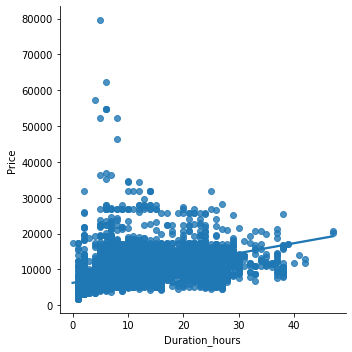

In [27]:
Duration_hours = ['Duration_hours']
x = df.loc[:, Duration_hours].values
y = df.loc[:,['Price']].values
x = StandardScaler().fit_transform(x)



sns.lmplot(x='Duration_hours',y = 'Price',data=df)


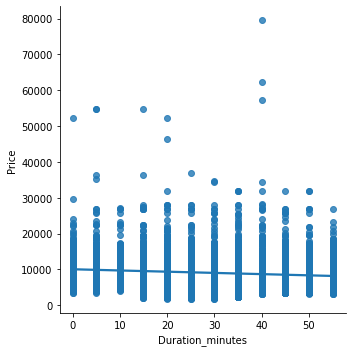

In [28]:
sns.lmplot(x='Duration_minutes',y = 'Price',data=df)


In [29]:
# divide dtypes in object type
categorial_data = [col for col in df.columns if df[col].dtypes=='object']
categorial_data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [30]:
# Divide dtype in integer type
numerical_data = [col for col in df.columns if df[col].dtypes!= 'object']
numerical_data


['Price',
 'journey_Day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

In [31]:
#Handle Categorial Data
categorial = df[categorial_data]
categorial.head()
# Feature encoding technique in data maybe it is nominal or ordinal data.

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [32]:
df[df['Airline']=='IndiGo']


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
11,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,4174,18,4,20,20,22,55,2,35
14,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,4804,24,4,17,15,19,50,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,IndiGo,Delhi,Cochin,DEL → BLR → COK,1 stop,No info,6037,15,5,2,0,7,45,5,45
10641,IndiGo,Chennai,Kolkata,MAA → CCU,non-stop,No info,7295,3,6,7,55,10,15,2,20
10649,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,4778,3,1,21,25,0,5,2,40
10664,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,4823,4,9,18,55,21,50,2,55


In [33]:
# As categorical data we can count values of each object dtype category which is Airline, Source, Destination etc.
categorial['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

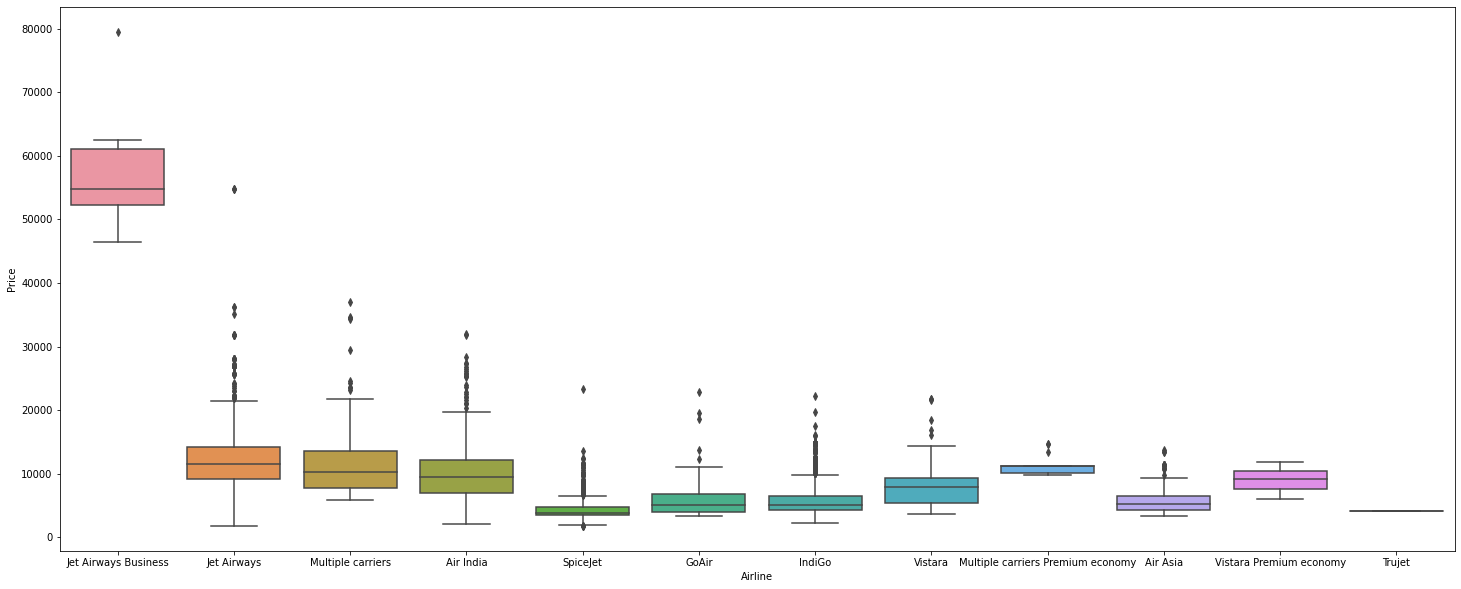

In [34]:
#Airline vs price plot
plt.figure(figsize=(25,10))
sns.boxplot(data = df.sort_values('Price', ascending = False), x = 'Airline', y = 'Price')


In [35]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [36]:
# to encode data for airline because machine learning not understand string data so it will required some mathematical data
AL = pd.get_dummies(categorial['Airline'],drop_first = True)
AL.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
#Source value counts
categorial['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


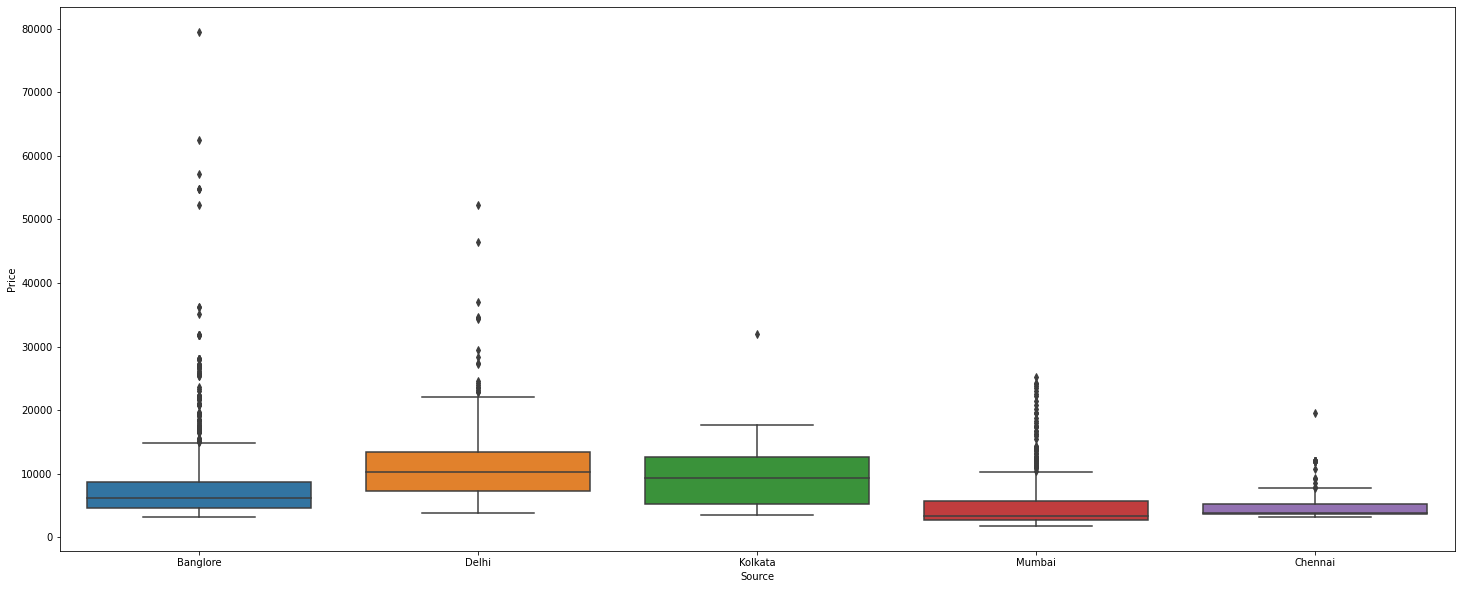

In [38]:
#Source vs price plot 
plt.figure(figsize=(25,10))
sns.boxplot(x = 'Source', y = 'Price', data = df.sort_values('Price', ascending = False))
df.head()


In [39]:
#value counts for source same as airline in new dataframe
Source = pd.get_dummies(categorial['Source'],drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [40]:
# no. of counts for destination
categorial['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


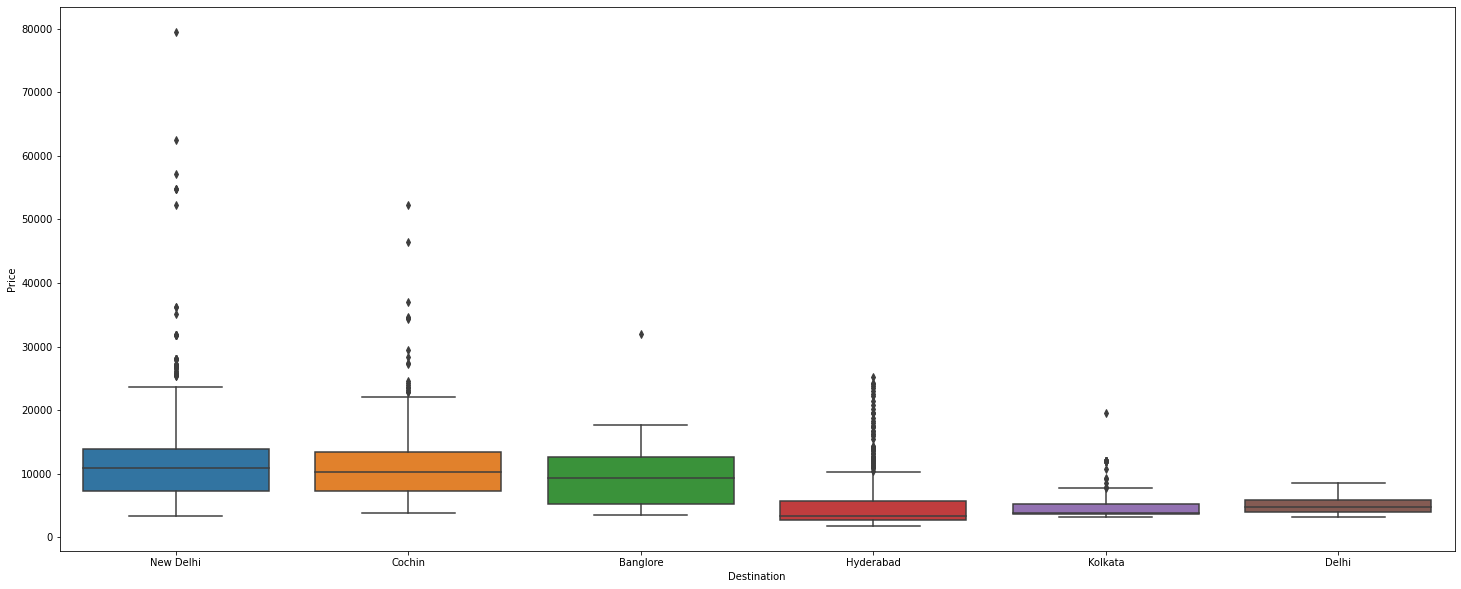

In [41]:
#plot graph Destination vs price
plt.figure(figsize=(25,10))
sns.boxplot(x = 'Destination', y = 'Price', data = df.sort_values('Price', ascending = False))
df.head()

In [42]:
#new vlaue count for Destination
Destination = pd.get_dummies(categorial['Destination'],drop_first = True)
Destination.head()


,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [43]:
# split the route column in no.of source and destination
categorial['Route_1'] = categorial['Route'].str.split('→').str[0]
categorial['Route_2'] = categorial['Route'].str.split('→').str[1]
categorial['Route_3'] = categorial['Route'].str.split('→').str[2]
categorial['Route_4'] = categorial['Route'].str.split('→').str[3]
categorial['Route_5'] = categorial['Route'].str.split('→').str[4]
categorial.head()

/tmp/ipykernel_4122425/1361697143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorial['Route_1'] = categorial['Route'].str.split('→').str[0]
/tmp/ipykernel_4122425/1361697143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorial['Route_2'] = categorial['Route'].str.split('→').str[1]
/tmp/ipykernel_4122425/1361697143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [44]:
drop_column(categorial,'Route')

/tmp/ipykernel_4122425/87096465.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1,inplace=True)


In [45]:
# Find null amount
categorial.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [46]:
categorial.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [47]:
# To fill null amount with None
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorial[i].fillna('None', inplace = True)
categorial.isnull().sum()

/tmp/ipykernel_4122425/517656252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorial[i].fillna('None', inplace = True)


Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [48]:
# Route wise category message
for i in categorial.columns:
    print('{} has total {} categories'.format(i,len(categorial[i].value_counts())))


Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [49]:
categorial.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [50]:
encoderlist = LabelEncoder()


In [51]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorial[i] = encoderlist.fit_transform(categorial[i])
       
    

/tmp/ipykernel_4122425/3261759400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorial[i] = encoderlist.fit_transform(categorial[i])


In [52]:
categorial.head(10)


,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
5,SpiceJet,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
6,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,0,7,8,13,5
7,Jet Airways,Banglore,New Delhi,1 stop,No info,0,7,8,13,5
8,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,0,7,8,13,5
9,Multiple carriers,Delhi,Cochin,1 stop,No info,3,7,6,13,5


In [53]:
drop_column(categorial,'Additional_Info')

/tmp/ipykernel_4122425/87096465.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1,inplace=True)


In [54]:
categorial['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [55]:
categorial['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [56]:
dict = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
categorial['Total_Stops'] = categorial['Total_Stops'].map(dict)
categorial.head()

/tmp/ipykernel_4122425/3940018013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorial['Total_Stops'] = categorial['Total_Stops'].map(dict)


,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [57]:
df[numerical_data]

,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [58]:
df_data = pd.concat([categorial,AL,Source,Destination,df[numerical_data]],axis=1)
df_data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [59]:
df_data.drop(['Airline','Source','Destination'],axis=1, inplace=True)
df_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [60]:
# if you want to see all columns and machine convert all the data into integer
pd.set_option('display.max_columns',36)
df_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


/home/jupyter-nidhi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

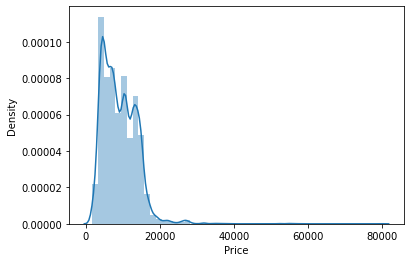

In [61]:
# To check the accuracy
sns.distplot(df_data['Price'])

/home/jupyter-nidhi/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

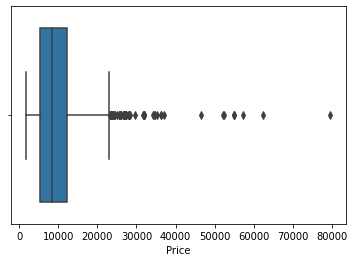

In [62]:
# To check accuracy but in box format so we can detect outliers
sns.boxplot(df_data['Price'])

In [63]:
# To check how mnay data points above the range or we can say outliers
len(df_data[df_data['Price']>=40000])

9

In [64]:
# Replace outliers of data points with median of the price
df_data['Price']=np.where(df_data['Price']>=40000,df_data['Price'].median(),df_data['Price'])


/home/jupyter-nidhi/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

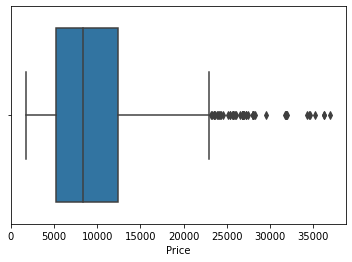

In [65]:
# To check the outliers replace with median or not which is greater than 40000
sns.boxplot(df_data['Price'])

In [66]:
# Drop the price column
A = df_data.drop('Price',axis=1)
A.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [67]:
#Check price column individually
B = df_data['Price']
B

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [68]:
#Independent dataframe and drop the price which nor contains price column in x dataframe
A = df_data
A = A.values.astype(np.float)
A = df_data.drop('Price', axis=1)
A.head()
    

/tmp/ipykernel_4122425/402205586.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = A.values.astype(np.float)


,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_Day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [69]:
#fetch dependent data
b = df_data 
b = b.values.astype(np.float) # convert string data into float
b = df_data['Price']
b

/tmp/ipykernel_4122425/3964575280.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = b.values.astype(np.float) # convert string data into float


0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [70]:
from sklearn.feature_selection import mutual_info_classif

In [71]:
#mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)[source]
# Higher the value indicates higher importance respect to dependent variable
mutual_info_classif(A,b)

array([2.17348021, 2.05680378, 2.784134  , 2.24950356, 1.45890776,
       0.71615692, 0.7708807 , 0.10616962, 0.67025847, 0.9404064 ,
       0.        , 0.56647912, 0.0118787 , 0.29408123, 0.        ,
       0.21572919, 0.01232991, 0.16990739, 1.55466656, 0.88446725,
       0.28381684, 1.55000134, 0.40724026, 0.29840919, 0.16624953,
       0.37935375, 1.0530329 , 0.841992  , 1.42542545, 1.2165216 ,
       1.86135159, 1.55537587, 1.78843447, 1.04483039])

In [72]:
C = pd.DataFrame(mutual_info_classif(A,b),index = A.columns)

In [73]:
# Sort the priority in ascending order
C.columns=['Priority']
C.sort_values(by='Priority',ascending=False)

,Priority
Route_2,2.776719
Route_3,2.300562
Total_Stops,2.183324
Route_1,2.066392
Arrival_Time_hour,1.901549
Duration_hours,1.770328
Arrival_Time_minute,1.534956
Delhi,1.530067
Cochin,1.521237
Route_4,1.442604


In [74]:
# Prediction on data, Try to fit build model using randomforest

In [75]:
# once algorithm runs into dataset using randomforest then and then only we can do some test on predict data
#split the dataset in two parts in train set and test set
#randomforest class

In [76]:
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size = 0.25)

In [77]:
RF = RandomForestRegressor()

In [78]:
RF.get_params(deep=False)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
RF.fit(A_train,b_train)

RandomForestRegressor()

In [80]:
RF.score(A_train,b_train)

0.9550771250930895

In [81]:
b_prediction=RF.predict(A_test)

In [82]:
b_prediction

array([ 9394.75      , 15218.87733333,  4824.35      , ...,
       13241.73      ,  8880.81      ,  4069.51      ])

/home/jupyter-nidhi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

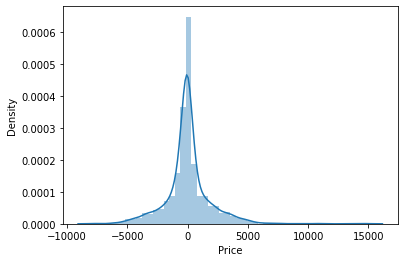

In [83]:
sns.distplot(b_test-b_prediction)

In [84]:
# check accuracy of data
metrics.r2_score(b_test,b_prediction) #r2:measuring the amount of variance in the predictions in the dataset

0.8226101296510164

In [85]:
#how the model perform with other metrics MAE, MSE, RMSE
print('Mean Absolute Error',metrics.mean_absolute_error(b_test,b_prediction))
print('Mean squared Error',metrics.mean_squared_error(b_test,b_prediction))
print('Root Mean Square Error',np.sqrt(metrics.mean_absolute_error(b_test,b_prediction)))

Mean Absolute Error 1142.7463018225794
Mean squared Error 3396731.718668352
Root Mean Square Error 33.80453078838071


In [86]:
# Hypertune the model maybe to increase accuracy also performance increased
RF=RandomForestRegressor()
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [87]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1000,num=5)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=40,num=8)]
min_samples_split = [5,10,15,20,100] #the min no. of sample required for a split.

In [88]:
RandomF_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth' :max_depth,
    'min_samples_split' :min_samples_split
}

In [89]:
RandomF_grid

{'n_estimators': [100, 325, 550, 775, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
 'min_samples_split': [5, 10, 15, 20, 100]}

In [90]:
Random=RandomizedSearchCV(RF,param_distributions=RandomF_grid,cv=3,verbose=2,n_jobs=-1)

In [91]:
Random.fit(A_train,b_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              100],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   verbose=2)

In [92]:
Random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 20,
 'max_features': 'auto',
 'max_depth': 20}

In [93]:
Random.predict(A_test)

array([ 9867.23489637, 14406.09271928,  4808.56362962, ...,
       12853.22475581,  9173.29333926,  4167.1598617 ])

In [94]:
Prediction = Random.predict(A_test)

/home/jupyter-nidhi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

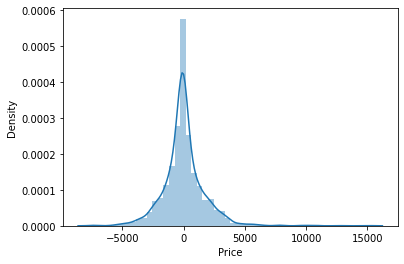

In [95]:
sns.distplot(b_test-Prediction)

In [96]:
metrics.r2_score(b_test,Prediction)

0.8476086630438828

In [97]:
print('Mean Absolute Error',metrics.mean_absolute_error(b_test,Prediction))
print('Mean squared Error',metrics.mean_squared_error(b_test,Prediction))
print('Root Mean Square Error',np.sqrt(metrics.mean_absolute_error(b_test,Prediction)))

Mean Absolute Error 1111.0895482524763
Mean squared Error 2918049.868748246
Root Mean Square Error 33.33300988888457


In [98]:
file=open('Random.pkl','wb')

In [99]:
pickle.dump(Random,file)

In [100]:
Fmodel = open('Random.pkl','rb')
ForestM = pickle.load(Fmodel)


EOFError: Ran out of input

In [ ]:
b_prediction = ForestM.predict(A_test)
b_prediction

In [ ]:
metrics.r2_score(b_test,b_prediction)

In [ ]:
sns.distplot(b_test-Prediction)